In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from source.project_manager import (
    load_experiment_metadata,
    delete_experiment_data,
    check_file_exists,
)

In [15]:
project_metadata = load_experiment_metadata()
project_metadata = project_metadata.set_index(["stream_name","stream_statistic","alpha"]).sort_index()
print(project_metadata.columns)
print(project_metadata.shape)

No slurm api data found creating data from paths


FileNotFoundError: 

In [3]:
project_metadata.index.value_counts()

stream_name            stream_statistic  alpha
image                  none              0.1      5
results_at_projection  meanx2            0.5      5
vanilla_grad_mask      meanx             0.1      5
results_at_projection  meanx2            1.0      5
                                         0.9      5
                                                 ..
log_probs              meanx2            1.0      5
results_at_projection  meanx             0.1      5
                                         0.2      5
                                         0.3      5
vanilla_grad_mask      meanx2            1.0      5
Name: count, Length: 70, dtype: int64

Text(0.01, 312, '312')

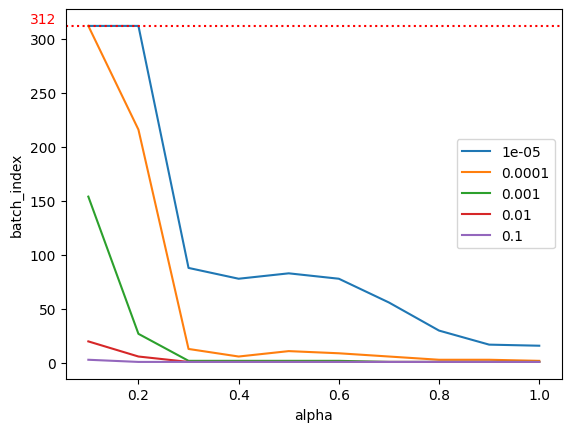

In [4]:
selected_rows = project_metadata.loc[("log_probs","meanx"),:]
selected_rows.groupby("min_change")["batch_index"].plot(legend=True)
plt.ylabel("batch_index")

# max_batches
max_batches = project_metadata.iloc[0,:]["max_batches"]
plt.axhline(y=max_batches, color="red",linestyle=":")
plt.text(0.01,max_batches, f"{max_batches:.0f}", color="red", ha="center", va="bottom")

In [5]:
project_metadata.loc[("log_probs","meanx")].groupby("min_change")["time_to_compute"].agg(['sum','count'])

,sum,count
min_change,,
0.00001,215.964407,10
0.00010,174.344888,10
0.00100,143.745237,10
0.01000,131.753347,10
0.10000,129.230285,10


Text(0, 0.5, 'results_at_projection 46')

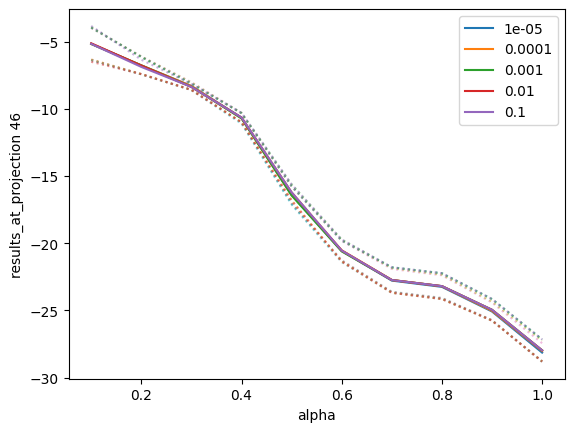

In [8]:
selected_rows = project_metadata.loc["results_at_projection",:]
values = selected_rows.loc[:,"data_path"].apply(lambda path: np.load(path))
selected_rows = project_metadata.loc[("results_at_projection","meanx"),:]

meanx = values.loc["meanx"]
std = np.sqrt(values.loc["meanx2"] - values.loc["meanx"]**2)
meanx.name = "meanx"
std.name = "stdx"
selected_rows = pd.concat([selected_rows,meanx,std],axis=1)
groupped = selected_rows.groupby("min_change")
groupped["meanx"].plot(legend=True)
groupped.apply(lambda x: plt.plot(
    x.index, 
    x["meanx"] - x["stdx"], 
    x.index,
    x["meanx"] + x["stdx"], 
    alpha=0.5,
    linestyle=":"))

plt.ylabel("results_at_projection 46")

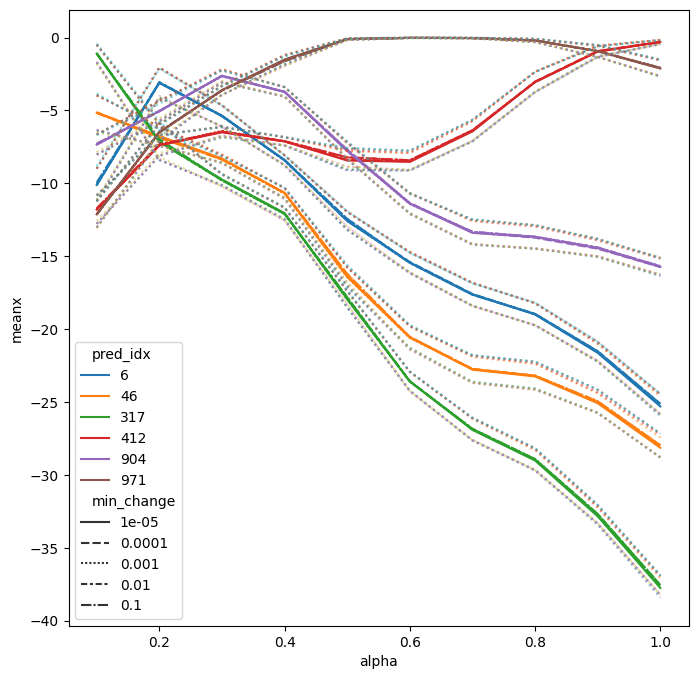

In [111]:
min_changes = project_metadata["min_change"].unique()
temp_metadata = project_metadata.set_index("min_change",append=True)
temp_metadata = temp_metadata.loc[("log_probs"),:]
values = temp_metadata.loc[:,"data_path"].apply(lambda path: np.load(path))

meanx = values.loc["meanx"]
meanx2 = values.loc["meanx2"]
meanx.name = "meanx"
stdx = (meanx2 - meanx**2).apply(lambda x: np.sqrt(x))
stdx.name = "stdx"
pred_ids = list(meanx.apply(np.argmax).unique())
pred_ids.append(46)

temp_metadata = []
for pred_id in pred_ids:
    topk_meanx = meanx.apply(lambda x:x[pred_id])
    topk_stdx = stdx.apply(lambda x:x[pred_id])
    new_indexer = pd.Series(data = pred_id, index=meanx.index,name="pred_idx")
    temp_cols = pd.concat([topk_meanx,topk_stdx,new_indexer],axis=1)
    temp_metadata.append(temp_cols)

temp_metadata = pd.concat(temp_metadata)
temp_metadata = temp_metadata.set_index("pred_idx",append=True)

fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.lineplot(ax=ax,x="alpha", y="meanx",
             hue="pred_idx", style="min_change",
             data=temp_metadata,palette="tab10")

groupped = temp_metadata.groupby(["pred_idx","min_change"])
groupped.apply(lambda x: ax.plot(
    x.index.get_level_values('alpha'), 
    x["meanx"] - x["stdx"], 
    x.index.get_level_values('alpha'),
    x["meanx"] + x["stdx"], 
    alpha=0.5,
    linestyle=":"));

In [3]:
# delete_experiment_data(project_metadata["data_path"])
# check_file_exists(project_metadata["data_path"])

stream_name        stream_statistic  alpha
image              none              0.1      False
                                     0.1      False
                                     0.1      False
                                     0.1      False
                                     0.1      False
                                              ...  
vanilla_grad_mask  meanx2            1.0      False
                                     1.0      False
                                     1.0      False
                                     1.0      False
                                     1.0      False
Name: data_path, Length: 350, dtype: bool

In [13]:
# project_metadata["path_prefix"] = project_metadata["path_prefix"].apply(lambda x: f"/local_storage/users/amirme/metadata/{x}.csv")
# paths = pd.Series(project_metadata["path_prefix"].unique())
paths[0]

'/local_storage/users/amirme/metadata/2023-08-30_16-04-00-722565.csv'

In [14]:
delete_experiment_data(paths)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
dtype: object